In [1]:
%matplotlib notebook
import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
import unittest
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from deepART import ProbART, base, dataset
from sklearn.datasets import make_moons

/usr/local/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Generate dataset

In [3]:
#sample_data = dataset.Clusters2d_overlap(nclusters=6,overlap=0.1,spread=0.1, data_range=[0, 10000])
#sample_data = dataset.TwoSpirals(100, noise=1)

X, y = make_moons(n_samples=200, noise=0.05)
sample_data = dataset.Dataset(X+0.5)

#npoints = 200
#sample_data = dataset.TwoSpirals(npoints, noise=30)

<IPython.core.display.Javascript object>


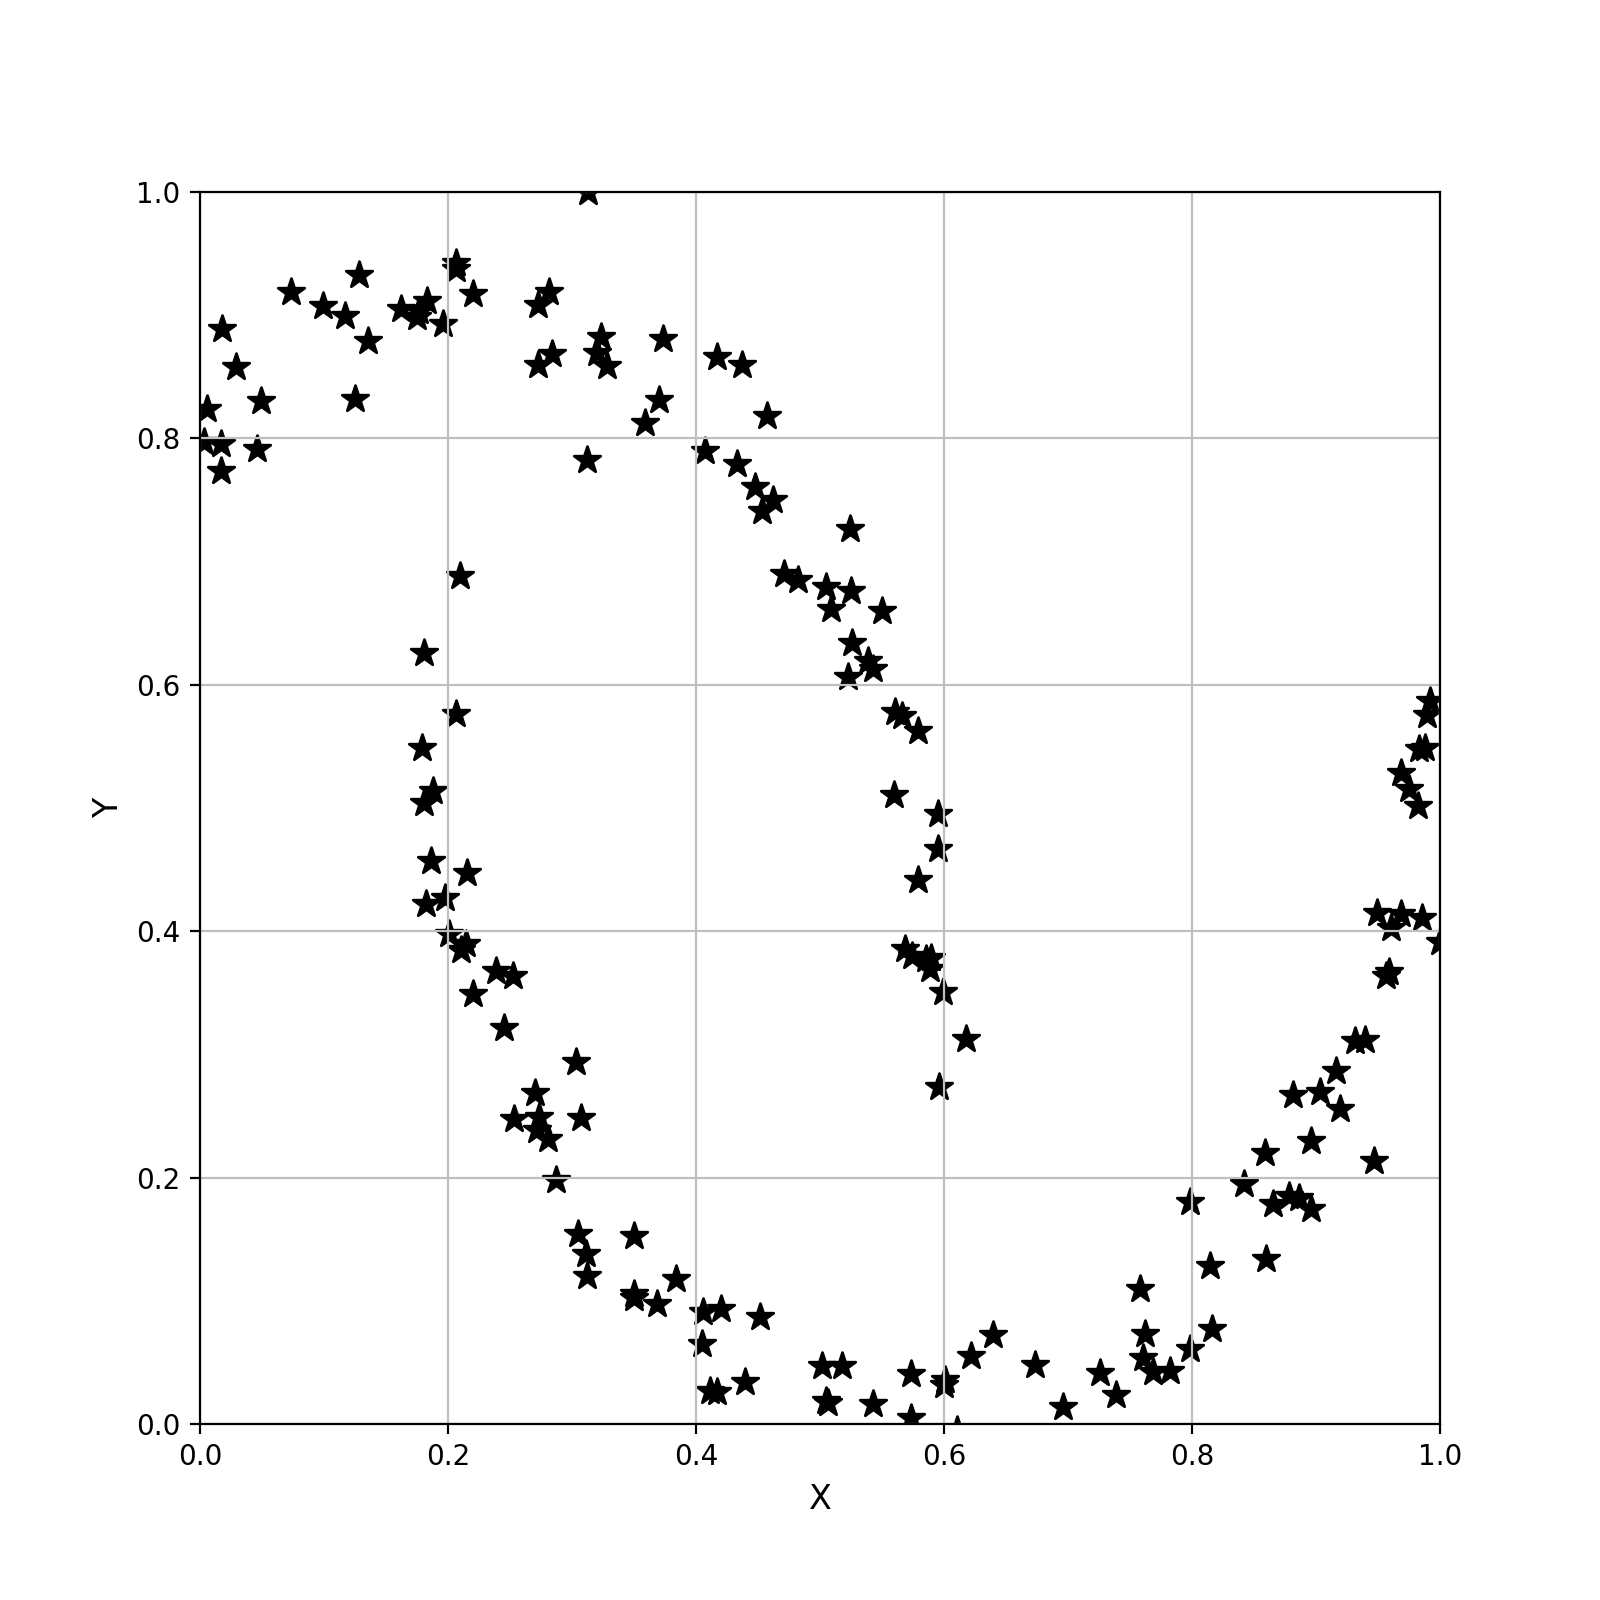

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping
ax.scatter(sample_data.data_normalized[...,0],sample_data.data_normalized[...,1],s=100,c='k',marker='*')
ax.axis((0, 1, 0, 1))
plt.show()
#fig.savefig('data_raw.png', bbox_inches='tight')

In [5]:
convergence = 10
neurons = 50
rho = 0.2598
beta = 0.75
alpha = 0.1
network = ProbART( 2, neurons, rho=rho,alpha=alpha, beta=beta,comp=True)
print("Start testing...")


#convergence tracking variables
prev_active = 0
converge = 0
results = []
while True:
    for I in sample_data.data_normalized:
        print(I.ravel())
        Z, k = network.fit_predict(I.ravel()) 
        if not k==None:
            print("zJ:\t{}\n".format(Z))
            print("Cluster:\t{}\n".format(k))
            print("\n\n\n\n")
        else:
            print("Unrecognized pattern:\n")



    if (prev_active < network.active):
        prev_active = network.active
        continue
    else:
        converge +=1
        if converge > convergence:
            print("Total Neurons Learned: {}\n\n".format(network.active))
            break

Start testing...
[0.9316237 0.3108316]
zJ:	[[0.9316237  0.31083161]
 [0.0683763  0.68916839]]

Cluster:	0






[-0.11887311  0.5810312 ]
zJ:	[array([[0.14375109, 0.31083161],
       [0.0683763 , 0.4865187 ]])]

Cluster:	[(0, 1.0)]






[ 0.65475404 -0.03015125]
zJ:	[array([[0.14375109, 0.05509446],
       [0.0683763 , 0.4865187 ]])]

Cluster:	[(0, 1.0)]






[ 0.70905316 -0.01133382]
zJ:	[array([[0.14375109, 0.00527325],
       [0.0683763 , 0.4865187 ]])]

Cluster:	[(0, 1.0)]






[0.30361894 0.29413316]
zJ:	[array([[0.14375109, 0.00527325],
       [0.0683763 , 0.4865187 ]])]

Cluster:	[(0, 1.0)]






[0.57312816 0.00458849]
zJ:	[array([[0.14375109, 0.00475968],
       [0.0683763 , 0.4865187 ]])]

Cluster:	[(0, 1.0)]






[-0.1947532   0.41392243]
Unrecognized pattern:

[0.28673676 0.1980626 ]
zJ:	[array([[0.14375109, 0.00475968],
       [0.0683763 , 0.4865187 ]])]

Cluster:	[(0, 0.9485848075142516)]






[-0.15068452  0.49147236]
zJ:	[array([[-0.1947532 ,  0.41392243],
       [






[0.5085716 0.6617781]
zJ:	[array([[0.14375109, 0.00475968],
       [0.04704806, 0.34551982]]), array([[-0.1947532 ,  0.32880438],
       [ 0.49322162,  0.02397117]])]

Cluster:	[(0, 0.3780044999716156), (1, 0.5612271035281425)]






[0.36891487 0.09719472]
zJ:	[array([[0.14375109, 0.00475968],
       [0.04704806, 0.34551982]])]

Cluster:	[(0, 0.9569479063059801)]






[0.17674348 0.90342253]
zJ:	[array([[-0.1947532 ,  0.32880438],
       [ 0.49322162,  0.02397117]])]

Cluster:	[(1, 0.9879495977672272)]






[0.43937185 0.03390044]
zJ:	[array([[0.14375109, 0.00475968],
       [0.04704806, 0.34551982]])]

Cluster:	[(0, 0.9765454545626735)]






[0.6220812  0.05521548]
zJ:	[array([[0.14375109, 0.00475968],
       [0.04704806, 0.34551982]])]

Cluster:	[(0, 0.9590821085228789)]






[0.20638777 0.942599  ]
zJ:	[array([[-0.1947532 ,  0.32880438],
       [ 0.49322162,  0.02397117]])]

Cluster:	[(1, 0.9924574945727961)]






[-0.18402106  0.2885808 ]
zJ:	[array([[-0.1947532 ,  0.298

zJ:	[array([[0.14375109, 0.00472637],
       [0.04704806, 0.34551982]]), array([[ 0.33707449, -0.03294284],
       [ 0.28868993,  0.86955938]])]

Cluster:	[(0, 0.26624964953802827), (3, 0.7114052179228642)]






[0.18819854 0.5140087 ]
zJ:	[array([[0.14375109, 0.00472637],
       [0.04704806, 0.34551982]]), array([[-0.20896351,  0.26924452],
       [ 0.46361426,  0.02397117]])]

Cluster:	[(0, 0.47843252154547883), (1, 0.4878154038568876)]






[0.46190116 0.7503251 ]
zJ:	[array([[-0.20896351,  0.26924452],
       [ 0.46361426,  0.02397117]])]

Cluster:	[(1, 0.8113788159646581)]






[0.57338536 0.04096372]
zJ:	[array([[0.14375109, 0.00472637],
       [0.04704806, 0.34551982]]), array([[ 0.33707449, -0.03294284],
       [ 0.28868993,  0.86955938]])]

Cluster:	[(0, 0.262133512657723), (3, 0.7004071142280247)]






[0.43309227 0.7789351 ]
zJ:	[array([[-0.20896351,  0.26924452],
       [ 0.46361426,  0.02397117]])]

Cluster:	[(1, 0.8731624020146052)]






[0.60037136 0.03139316]
zJ:	[

zJ:	[array([[-0.20896351,  0.26924452],
       [ 0.46182478,  0.00615867]])]

Cluster:	[(1, 0.8836092682530988)]






[0.86001956 0.1341754 ]
zJ:	[array([[0.84865548, 0.15674026],
       [0.00157185, 0.41762427]]), array([[ 0.26483723, -0.03713234],
       [ 0.19038082,  0.68385172]])]

Cluster:	[(2, 0.48448336263870756), (3, 0.2891172562484041)]






[-0.1760088  0.3402561]
zJ:	[array([[-0.20896351,  0.26924452],
       [ 0.46182478,  0.00615867]])]

Cluster:	[(1, 0.9724061978868915)]






[0.8158941  0.07689267]
zJ:	[array([[0.84177472, 0.13997012],
       [0.00157185, 0.41762427]]), array([[ 0.26483723, -0.03713234],
       [ 0.18807398,  0.68385172]])]

Cluster:	[(2, 0.28003578225501785), (3, 0.49016932018445786)]






[-0.08690345  0.6604412 ]
zJ:	[array([[-0.20896351,  0.26924452],
       [ 0.46182478,  0.00615867]])]

Cluster:	[(1, 0.9837823174117484)]






[0.11720683 0.8990849 ]
zJ:	[array([[-0.20896351,  0.26924452],
       [ 0.46182478,  0.00615867]])]

Cluster:	[(1, 0.

[0.5501568  0.65950257]
zJ:	[array([[0.14375109, 0.00278836],
       [0.04645086, 0.34145282]])]

Cluster:	[(0, 0.4390272069435019)]






[0.32372794 0.88225037]
zJ:	[array([[-0.21258463,  0.26924452],
       [ 0.46168124,  0.00615867]]), array([[0.13786394, 0.8799465 ],
       [0.67024055, 0.        ]])]

Cluster:	[(1, 0.24615144463468305), (4, 0.7422522289898915)]






[0.21433999 0.38989663]
zJ:	[array([[0.14375109, 0.00278836],
       [0.04645086, 0.34145282]]), array([[-0.21258463,  0.26924452],
       [ 0.46168124,  0.00615867]]), array([[ 0.22649913, -0.03713234],
       [ 0.15365832,  0.61341362]])]

Cluster:	[(0, 0.26656294455281526), (1, 0.2591063824298425), (3, 0.42936382960974095)]






[0.81438327 0.1278983 ]
zJ:	[array([[0.79467529, 0.10721627],
       [0.00157185, 0.41499448]]), array([[ 0.22649913, -0.03713234],
       [ 0.15365832,  0.61341362]])]

Cluster:	[(2, 0.46215189817079105), (3, 0.35637545382390534)]






[0.589663   0.37789667]
zJ:	[array([[0.14375109, 0.

zJ:	[array([[-0.21347327,  0.26908684],
       [ 0.46061052,  0.00615867]]), array([[-0.06889618,  0.70053813],
       [ 0.55083598,  0.        ]])]

Cluster:	[(1, 0.2883437805494431), (4, 0.7070335350367761)]






[0.21999232 0.34875935]
zJ:	[array([[0.14375109, 0.00113945],
       [0.04555738, 0.34056286]]), array([[-0.21347327,  0.26908684],
       [ 0.46061052,  0.00615867]]), array([[ 0.20385246, -0.03865479],
       [ 0.12484323,  0.55798691]])]

Cluster:	[(0, 0.2546310650613364), (1, 0.24845350077167114), (3, 0.4604682293102381)]






[0.12523232 0.8320302 ]
zJ:	[array([[-0.21347327,  0.26908684],
       [ 0.46061052,  0.00615867]]), array([[-0.06889618,  0.70053813],
       [ 0.55083598,  0.        ]])]

Cluster:	[(1, 0.2856299045850639), (4, 0.7003789738976731)]






[-0.11327067  0.62556255]
zJ:	[array([[-0.21347327,  0.26908684],
       [ 0.46061052,  0.00615867]]), array([[-0.08440816,  0.67432893],
       [ 0.55083598,  0.        ]])]

Cluster:	[(1, 0.5273459379775425),


[0.28178424 0.91856617]
zJ:	[array([[-0.21347327,  0.26908684],
       [ 0.46061052,  0.00615867]]), array([[-0.13261771,  0.55454099],
       [ 0.49249929,  0.        ]])]

Cluster:	[(1, 0.3319039531043605), (4, 0.6609625916994352)]






[0.5501568  0.65950257]
zJ:	[array([[0.14375109, 0.00113945],
       [0.044471  , 0.34055026]]), array([[-0.13261771,  0.55454099],
       [ 0.48234056,  0.        ]])]

Cluster:	[(0, 0.2568584901051297), (4, 0.31753924265677036)]






[0.32372794 0.88225037]
zJ:	[array([[-0.21347327,  0.26908684],
       [ 0.46061052,  0.00615867]]), array([[-0.13261771,  0.55454099],
       [ 0.48234056,  0.        ]])]

Cluster:	[(1, 0.33217837714242404), (4, 0.6547228788757163)]






[0.21433999 0.38989663]
zJ:	[array([[0.14375109, 0.00113945],
       [0.044471  , 0.34055026]]), array([[-0.21347327,  0.26908684],
       [ 0.46061052,  0.00615867]]), array([[ 0.20024256, -0.03865479],
       [ 0.10705494,  0.53676836]])]

Cluster:	[(0, 0.24621860434327636), (1,


[0.9395456 0.3118731]
zJ:	[array([[1.43751090e-01, 1.79245060e-04],
       [4.38805161e-02, 3.40176479e-01]]), array([[ 5.35409010e-01, -8.23133549e-03],
       [ 3.39842911e-04,  4.06846324e-01]]), array([[ 0.19309705, -0.03922514],
       [ 0.08234569,  0.52584627]])]

Cluster:	[(0, 0.2412380366829646), (2, 0.4821961525906594), (3, 0.2760849712951469)]






[0.47134155 0.6903026 ]
zJ:	[array([[-0.21370196,  0.26895018],
       [ 0.46061052,  0.00615867]]), array([[-0.15306063,  0.52927988],
       [ 0.46407097,  0.        ]])]

Cluster:	[(1, 0.25724709994443873), (4, 0.4729395390381094)]






[0.35003757 0.102542  ]
zJ:	[array([[1.43751090e-01, 1.79245060e-04],
       [4.38805161e-02, 3.40176479e-01]]), array([[ 0.19309705, -0.03922514],
       [ 0.08234569,  0.52584627]])]

Cluster:	[(0, 0.3382370790398703), (3, 0.5516243554005179)]






[-0.06077973  0.7909789 ]
zJ:	[array([[-0.21370196,  0.26895018],
       [ 0.46061052,  0.00615867]]), array([[-0.15306063,  0.52927988],
     


[0.31252563 1.        ]
zJ:	[array([[-0.172283  ,  0.49151416],
       [ 0.45369577,  0.        ]])]

Cluster:	[(4, 0.651874756255725)]






[0.7604841 0.0534461]
zJ:	[array([[1.43751090e-01, 1.79245060e-04],
       [4.31741152e-02, 3.40176479e-01]]), array([[ 5.10876324e-01, -2.02094297e-02],
       [ 3.39842911e-04,  3.94563611e-01]]), array([[ 0.19139344, -0.03922514],
       [ 0.06085878,  0.52584627]])]

Cluster:	[(0, 0.22365482077642132), (2, 0.42627629724989546), (3, 0.34988951182910044)]






[0.00531092 0.82389116]
zJ:	[array([[-0.21370196,  0.26895018],
       [ 0.46061052,  0.00615867]]), array([[-0.172283  ,  0.49151416],
       [ 0.45369577,  0.        ]])]

Cluster:	[(1, 0.3715750485347005), (4, 0.6261797527702645)]






[0.0176877 0.888724 ]
zJ:	[array([[-0.21370196,  0.26895018],
       [ 0.46061052,  0.00615867]]), array([[-0.172283  ,  0.49151416],
       [ 0.45369577,  0.        ]])]

Cluster:	[(1, 0.37205777068362444), (4, 0.6269932380596075)]






[0.8592439  

[0.12845144 0.93297905]
zJ:	[array([[-0.21370196,  0.2688359 ],
       [ 0.46061052,  0.00615867]]), array([[-0.172283  ,  0.48466886],
       [ 0.45007448,  0.        ]])]

Cluster:	[(1, 0.37477135077982215), (4, 0.6224304483905196)]






[0.8418305 0.1946771]
zJ:	[array([[1.43751090e-01, 1.79245060e-04],
       [4.28295313e-02, 3.39881952e-01]]), array([[ 4.97562095e-01, -2.13773022e-02],
       [ 3.39842911e-04,  3.77432864e-01]]), array([[ 0.18909446, -0.03922514],
       [ 0.04991189,  0.52239505]])]

Cluster:	[(0, 0.22864937625264214), (2, 0.42151327485578294), (3, 0.34937868618754464)]






[0.2839287 0.8682405]
zJ:	[array([[-0.21370196,  0.2688359 ],
       [ 0.46061052,  0.00615867]]), array([[-0.172283  ,  0.48466886],
       [ 0.45007448,  0.        ]])]

Cluster:	[(1, 0.3703912514043185), (4, 0.6151558602646746)]






[0.25301018 0.24765885]
zJ:	[array([[1.43751090e-01, 1.79245060e-04],
       [4.28295313e-02, 3.39881952e-01]]), array([[ 0.18909446, -0.03922514],
       


[0.52483  0.676356]
zJ:	[array([[-0.21376816,  0.2688359 ],
       [ 0.46061052,  0.00615867]]), array([[ 4.61428107e-01, -3.00193065e-02],
       [ 1.88219060e-04,  3.68722538e-01]]), array([[-0.19170515,  0.4285941 ],
       [ 0.44183333,  0.        ]])]

Cluster:	[(1, 0.2376638908096185), (2, 0.21591392346842053), (4, 0.34466591853459655)]






[0.40507478 0.0645999 ]
zJ:	[array([[ 0.14375109, -0.00069422],
       [ 0.04232339,  0.33988195]]), array([[ 4.50615872e-01, -3.00193065e-02],
       [ 1.88219060e-04,  3.68722538e-01]]), array([[ 0.18746502, -0.03953482],
       [ 0.02991176,  0.50860734]])]

Cluster:	[(0, 0.29940329214731043), (2, 0.25582008266297135), (3, 0.43586579620764015)]






[0.18819854 0.5140087 ]
zJ:	[array([[ 0.14375109, -0.00069422],
       [ 0.04232339,  0.33988195]]), array([[-0.21376816,  0.2688359 ],
       [ 0.46061052,  0.00615867]]), array([[ 0.18746502, -0.03953482],
       [ 0.02991176,  0.50468722]]), array([[-0.19170515,  0.4285941 ],
       [ 0.4

zJ:	[array([[ 4.30317273e-01, -3.00193065e-02],
       [ 1.88219060e-04,  3.46494639e-01]]), array([[ 0.18638847, -0.03953482],
       [ 0.02991176,  0.49809006]])]

Cluster:	[(2, 0.4353972188732388), (3, 0.3843860309752525)]






[0.45737267 0.81794196]
zJ:	[array([[-0.21376816,  0.26874406],
       [ 0.46061052,  0.00615867]]), array([[-0.19170515,  0.42328706],
       [ 0.44131456,  0.        ]])]

Cluster:	[(1, 0.37316390271225003), (4, 0.5355552433888392)]






[0.12845144 0.93297905]
zJ:	[array([[-0.21376816,  0.26874406],
       [ 0.46061052,  0.00615867]]), array([[-0.19170515,  0.42328706],
       [ 0.44131456,  0.        ]])]

Cluster:	[(1, 0.4095205809189795), (4, 0.587733413636)]






[0.8418305 0.1946771]
zJ:	[array([[ 0.14375109, -0.00069422],
       [ 0.04212916,  0.33988195]]), array([[ 4.30317273e-01, -3.00193065e-02],
       [ 1.88219060e-04,  3.46494639e-01]]), array([[ 0.18638847, -0.03953482],
       [ 0.02991176,  0.49809006]])]

Cluster:	[(0, 0.248121890958603


[0.18819854 0.5140087 ]
zJ:	[array([[ 0.14375109, -0.00149746],
       [ 0.04171427,  0.33988195]]), array([[-0.21379717,  0.26874406],
       [ 0.46061052,  0.00615867]]), array([[ 0.18516866, -0.03974078],
       [ 0.01960728,  0.49202476]]), array([[-0.2001259 ,  0.35553054],
       [ 0.43987163,  0.        ]])]

Cluster:	[(0, 0.22187646262018484), (1, 0.2204586266880748), (3, 0.27511820235193113), (4, 0.2688115485427778)]






[0.46190116 0.7503251 ]
zJ:	[array([[-0.21379717,  0.26874406],
       [ 0.46061052,  0.00615867]]), array([[-0.2001259 ,  0.35553054],
       [ 0.43987163,  0.        ]])]

Cluster:	[(1, 0.3454565878896443), (4, 0.42141936154015625)]






[0.57338536 0.04096372]
zJ:	[array([[ 0.14375109, -0.00149746],
       [ 0.04171427,  0.33988195]]), array([[ 4.14401479e-01, -3.32363790e-02],
       [ 1.13047063e-04,  3.36171385e-01]]), array([[ 0.18516866, -0.03974078],
       [ 0.01960728,  0.49202476]])]

Cluster:	[(0, 0.25419510904834547), (2, 0.3917598472588069),

zJ:	[array([[ 3.95275023e-01, -3.32363790e-02],
       [ 1.13047063e-04,  3.21556625e-01]]), array([[ 0.18457101, -0.03974078],
       [ 0.01767213,  0.47650126]])]

Cluster:	[(2, 0.4160941492409465), (3, 0.34749671519767905)]






[ 0.51624304 -0.0236863 ]
zJ:	[array([[ 3.95275023e-01, -3.32363790e-02],
       [ 1.13047063e-04,  3.21556625e-01]]), array([[ 0.18457101, -0.03974078],
       [ 0.01767213,  0.47650126]])]

Cluster:	[(2, 0.42072260269478134), (3, 0.38509715577666787)]






[0.45737267 0.81794196]
zJ:	[array([[-0.21379717,  0.26867219],
       [ 0.46061052,  0.00615867]]), array([[-0.2001259 ,  0.34153625],
       [ 0.439755  ,  0.        ]])]

Cluster:	[(1, 0.412014573503456), (4, 0.48580646810460953)]






[0.12845144 0.93297905]
zJ:	[array([[-0.21379717,  0.26867219],
       [ 0.46061052,  0.00615867]]), array([[-0.2001259 ,  0.34153625],
       [ 0.439755  ,  0.        ]])]

Cluster:	[(1, 0.45765920050878905), (4, 0.5396260571663716)]






[0.8418305 0.1946771]
zJ:	


[0.17506225 0.89851695]
zJ:	[array([[-0.21381481,  0.26867219],
       [ 0.46061052,  0.00615867]]), array([[-0.20502174,  0.32659876],
       [ 0.43875374,  0.        ]])]

Cluster:	[(1, 0.4687294645625819), (4, 0.5238176650105307)]






[0.5742013  0.38016793]
zJ:	[array([[ 3.84593709e-01, -3.54178801e-02],
       [ 7.12117877e-05,  3.18859389e-01]]), array([[ 0.18370172, -0.03987848],
       [ 0.01307267,  0.47650126]])]

Cluster:	[(2, 0.2754515645755799), (3, 0.2566144496662422)]






[0.2097074 0.6879375]
zJ:	[array([[-0.21381481,  0.26867219],
       [ 0.46061052,  0.00615867]]), array([[-0.20502174,  0.32659876],
       [ 0.43875374,  0.        ]])]

Cluster:	[(1, 0.3453226751720699), (4, 0.3859072899388274)]






[0.34995216 0.10566223]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.0412826 ,  0.33963158]]), array([[ 3.77825092e-01, -3.54178801e-02],
       [ 7.12117877e-05,  3.18859389e-01]]), array([[ 0.18370172, -0.03987848],
       [ 0.01307267,  0.47650126]])]

Clu


Cluster:	[(1, 0.47167580967637196), (4, 0.5259275662599103)]






[0.5085716 0.6617781]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04127524,  0.33940972]]), array([[-0.21381481,  0.26867219],
       [ 0.46061052,  0.00615867]]), array([[ 3.77825092e-01, -3.54178801e-02],
       [ 7.12117877e-05,  3.11286985e-01]]), array([[-0.20502174,  0.32575954],
       [ 0.43875374,  0.        ]])]

Cluster:	[(0, 0.20984087247338531), (1, 0.21486203407286006), (2, 0.2974191871541546), (4, 0.23900564601867716)]






[0.36891487 0.09719472]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04127524,  0.33940972]]), array([[ 3.75545734e-01, -3.54178801e-02],
       [ 7.12117877e-05,  3.11286985e-01]]), array([[ 0.18275427, -0.03987848],
       [ 0.01246457,  0.45909492]])]

Cluster:	[(0, 0.2824473934603134), (2, 0.3410852358732778), (3, 0.35948051830396804)]






[0.17674348 0.90342253]
zJ:	[array([[-0.21381481,  0.26867219],
       [ 0.46061052,  0.00615867]]), array([[-0.20502174,  0.32


[-0.01211704  0.83501506]
zJ:	[array([[-0.21382548,  0.26861554],
       [ 0.46061052,  0.00615867]]), array([[-0.20819013,  0.31253574],
       [ 0.43797051,  0.        ]])]

Cluster:	[(1, 0.48401121173866435), (4, 0.5147525182627714)]






[0.19741537 0.426883  ]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04098679,  0.33940972]]), array([[-0.21382548,  0.26861554],
       [ 0.46061052,  0.00615867]]), array([[ 0.18226633, -0.03997104],
       [ 0.00885196,  0.44880696]]), array([[-0.20819013,  0.31253574],
       [ 0.43797051,  0.        ]])]

Cluster:	[(0, 0.22795462989537463), (1, 0.2276905478344957), (3, 0.2809604731227606), (4, 0.24192907549964018)]






[0.9560973 0.3637634]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04098679,  0.33940972]]), array([[ 3.62116008e-01, -3.69110584e-02],
       [ 4.58916730e-05,  3.03345546e-01]]), array([[ 0.18226633, -0.03997104],
       [ 0.00885196,  0.44880696]])]

Cluster:	[(0, 0.2820252767524035), (2, 0.3704804321850289), 

zJ:	[array([[-0.21382548,  0.268569  ],
       [ 0.46061052,  0.00615867]]), array([[-0.20819013,  0.31253574],
       [ 0.43797051,  0.        ]])]

Cluster:	[(1, 0.47314033048964527), (4, 0.503262988867467)]






[0.25301018 0.24765885]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04098679,  0.33921834]]), array([[ 0.18160358, -0.03997104],
       [ 0.00885196,  0.4401217 ]])]

Cluster:	[(0, 0.29098594237832615), (3, 0.3509982195327453)]






[0.38350245 0.11743197]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04098679,  0.33921834]]), array([[ 3.59321694e-01, -3.69110584e-02],
       [ 4.58916730e-05,  2.97677065e-01]]), array([[ 0.18160358, -0.03997104],
       [ 0.00885196,  0.4401217 ]])]

Cluster:	[(0, 0.2788721608341629), (2, 0.359931208170446), (3, 0.3359515267137681)]






[0.5661985 0.5747236]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04098679,  0.33921834]]), array([[ 3.59321694e-01, -3.69110584e-02],
       [ 4.58916730e-05,  2.97677065e-01]]), arra

zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04074792,  0.33921834]]), array([[ 3.49993309e-01, -3.79387613e-02],
       [ 3.00183536e-05,  2.84456636e-01]]), array([[ 0.18136136, -0.0400335 ],
       [ 0.00638246,  0.43421295]])]

Cluster:	[(0, 0.2924917098022031), (2, 0.358095735183882), (3, 0.3454562429470905)]






[0.43309227 0.7789351 ]
zJ:	[array([[-0.21383188,  0.268569  ],
       [ 0.46061052,  0.00615867]]), array([[-0.21026015,  0.3104794 ],
       [ 0.43733173,  0.        ]])]

Cluster:	[(1, 0.3845378405451172), (4, 0.40345582850863054)]






[0.60037136 0.03139316]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04074792,  0.33921834]]), array([[ 3.49993309e-01, -3.79387613e-02],
       [ 3.00183536e-05,  2.84456636e-01]]), array([[ 0.18136136, -0.0400335 ],
       [ 0.00638246,  0.43421295]])]

Cluster:	[(0, 0.29306308533376757), (2, 0.35879526660369565), (3, 0.34613108342232873)]






[0.5857225  0.37768966]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.

zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04074792,  0.33905306]]), array([[ 3.37825845e-01, -3.79387613e-02],
       [ 3.00183536e-05,  2.76567974e-01]]), array([[-0.21026015,  0.3104794 ],
       [ 0.43733173,  0.        ]])]

Cluster:	[(0, 0.21170226811278173), (2, 0.24693141553701844), (4, 0.222111309451788)]






[0.94651854 0.21333255]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04074792,  0.33905306]]), array([[ 3.37825845e-01, -3.79387613e-02],
       [ 3.00183536e-05,  2.76567974e-01]]), array([[ 0.18088489, -0.0400335 ],
       [ 0.00638246,  0.42893776]])]

Cluster:	[(0, 0.3001027590534856), (2, 0.35004253738161917), (3, 0.34976115442546346)]






[-0.05137466  0.779582  ]
zJ:	[array([[-0.21383188,  0.26853148],
       [ 0.46061052,  0.00615867]]), array([[-0.21026015,  0.3104794 ],
       [ 0.43733173,  0.        ]])]

Cluster:	[(1, 0.48713726956713377), (4, 0.51116171039556)]






[0.23861307 0.3675644 ]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0

zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.0405522 ,  0.33905306]]), array([[ 3.33098612e-01, -3.86172842e-02],
       [ 2.02006859e-05,  2.73039174e-01]]), array([[ 0.18079129, -0.04007741],
       [ 0.00451462,  0.42445542]])]

Cluster:	[(0, 0.2978426002643451), (2, 0.3397055062909597), (3, 0.3416254117270176)]






[0.52483  0.676356]
zJ:	[array([[-0.21383579,  0.26853148],
       [ 0.46061052,  0.00615867]]), array([[ 3.33098612e-01, -3.86172842e-02],
       [ 2.02006859e-05,  2.73039174e-01]]), array([[-0.21158854,  0.30915417],
       [ 0.4367946 ,  0.        ]])]

Cluster:	[(1, 0.24271385577992566), (2, 0.2765850003519416), (4, 0.2522338586257581)]






[0.40507478 0.0645999 ]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.0405522 ,  0.33905306]]), array([[ 3.33098612e-01, -3.86172842e-02],
       [ 2.02006859e-05,  2.73039174e-01]]), array([[ 0.18079129, -0.04007741],
       [ 0.00451462,  0.42445542]])]

Cluster:	[(0, 0.30121496649633944), (2, 0.3435518713751397)


[0.8418305 0.1946771]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.0405522 ,  0.33891249]]), array([[ 3.24808161e-01, -3.86172842e-02],
       [ 2.02006859e-05,  2.63619966e-01]]), array([[ 0.18043095, -0.04007741],
       [ 0.00451462,  0.42390685]])]

Cluster:	[(0, 0.30922284507893955), (2, 0.3363097523349213), (3, 0.35399644439141736)]






[0.2839287 0.8682405]
zJ:	[array([[-0.21383579,  0.26850113],
       [ 0.46061052,  0.00615867]]), array([[-0.21158854,  0.30915417],
       [ 0.4367946 ,  0.        ]])]

Cluster:	[(1, 0.4736071820759494), (4, 0.49240564839613216)]






[0.25301018 0.24765885]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.0405522 ,  0.33891249]]), array([[ 0.18043095, -0.04007741],
       [ 0.00451462,  0.42390685]])]

Cluster:	[(0, 0.28991297813281264), (3, 0.3318906254023474)]






[0.38350245 0.11743197]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.0405522 ,  0.33891249]]), array([[ 3.24808161e-01, -3.86172842e-02],
       [ 2.02006859e-0

zJ:	[array([[-0.21383819,  0.26850113],
       [ 0.46061052,  0.00615867]]), array([[-0.21243088,  0.3083112 ],
       [ 0.43564739,  0.        ]])]

Cluster:	[(1, 0.45876092633871784), (4, 0.47299902691136947)]






[0.20647286 0.57666135]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04039649,  0.33891249]]), array([[-0.21383819,  0.26850113],
       [ 0.46061052,  0.00615867]]), array([[ 0.1804289 , -0.04010798],
       [ 0.00314069,  0.42098758]]), array([[-0.21243088,  0.3083112 ],
       [ 0.43564739,  0.        ]])]

Cluster:	[(0, 0.2328214999473582), (1, 0.23323125971808595), (3, 0.2636619251119201), (4, 0.2404019540171506)]






[-0.12884632  0.6132465 ]
zJ:	[array([[-0.21383819,  0.26850113],
       [ 0.46061052,  0.00615867]]), array([[-0.21243088,  0.3083112 ],
       [ 0.43564739,  0.        ]])]

Cluster:	[(1, 0.4904026455605051), (4, 0.5056227782869561)]






[0.69614774 0.01379378]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04039649,  0.33891249]]), arra


Cluster:	[(1, 0.42483489069256103), (4, 0.4380531599112942)]






[0.12845144 0.93297905]
zJ:	[array([[-0.21383819,  0.26847657],
       [ 0.46061052,  0.00615867]]), array([[-0.21243088,  0.3083112 ],
       [ 0.43564739,  0.        ]])]

Cluster:	[(1, 0.4909434627743727), (4, 0.5062186273248872)]






[0.8418305 0.1946771]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04039649,  0.33879405]]), array([[ 3.15571616e-01, -3.90763512e-02],
       [ 1.38866722e-05,  2.56150906e-01]]), array([[ 0.18014135, -0.04010798],
       [ 0.00314069,  0.42098758]])]

Cluster:	[(0, 0.31546623557494985), (2, 0.32694522330697473), (3, 0.3571127329836552)]






[0.2839287 0.8682405]
zJ:	[array([[-0.21383819,  0.26847657],
       [ 0.46061052,  0.00615867]]), array([[-0.21243088,  0.3083112 ],
       [ 0.43564739,  0.        ]])]

Cluster:	[(1, 0.4735490603102104), (4, 0.4882830172063925)]






[0.25301018 0.24765885]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04039649,  0.33879405]]), 

zJ:	[array([[-0.21383969,  0.26847657],
       [ 0.46061052,  0.00615867]]), array([[ 3.14862998e-01, -3.93935918e-02],
       [ 9.69035268e-06,  2.56150906e-01]]), array([[-0.21296046,  0.30777996],
       [ 0.43480461,  0.        ]])]

Cluster:	[(1, 0.249632540736705), (2, 0.25747896374380635), (4, 0.25594060240106714)]






[0.40507478 0.0645999 ]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04027464,  0.33879405]]), array([[ 3.14862998e-01, -3.93935918e-02],
       [ 9.69035268e-06,  2.56150906e-01]]), array([[ 0.18014135, -0.04012901],
       [ 0.00215889,  0.41877707]])]

Cluster:	[(0, 0.3136428110028411), (2, 0.3242004744688419), (3, 0.3521683139824876)]






[0.18819854 0.5140087 ]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04027464,  0.33879405]]), array([[-0.21383969,  0.26847657],
       [ 0.46061052,  0.00615867]]), array([[ 0.18014135, -0.04012901],
       [ 0.00215889,  0.41877707]]), array([[-0.21296046,  0.30777996],
       [ 0.43480461,  0.        ]])]


[0.23861307 0.3675644 ]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04027464,  0.3386954 ]]), array([[-0.21383969,  0.26845661],
       [ 0.46061052,  0.00615867]]), array([[ 0.17991091, -0.04012901],
       [ 0.00215889,  0.41877707]]), array([[-0.21296046,  0.30777996],
       [ 0.43480461,  0.        ]])]

Cluster:	[(0, 0.22664458808355775), (1, 0.22724745306023117), (3, 0.25440432092089327), (4, 0.23295630410400953)]






[0.35012877 0.15253758]
zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04027464,  0.3386954 ]]), array([[ 3.11448993e-01, -3.93935918e-02],
       [ 9.69035268e-06,  2.54753160e-01]]), array([[ 0.17991091, -0.04012901],
       [ 0.00215889,  0.41877707]])]

Cluster:	[(0, 0.30217803400151366), (2, 0.3080021201243955), (3, 0.3391892045047367)]






[-0.12793943  0.62486345]
zJ:	[array([[-0.21383969,  0.26845661],
       [ 0.46061052,  0.00615867]]), array([[-0.21296046,  0.30777996],
       [ 0.43480461,  0.        ]])]

Cluster:	[(1, 0.4918660025420995

In [6]:
#PRedict
pred = []
for I in sample_data.data_normalized:
        Z, k = network.fit_predict(I.ravel(),learn=False) 
        if not k==None:
            print("zJ:\t{}\n".format(Z))
            print("Cluster:\t{}\n".format(k))
            print("\n\n")
            pred.append(k)
        else:
            print("Unrecognized pattern:\n")
            pred.append(-1)


zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04018077,  0.3386954 ]]), array([[ 3.11448993e-01, -3.96183951e-02],
       [ 6.80269991e-06,  2.54753160e-01]]), array([[ 0.17991091, -0.04014326],
       [ 0.00147646,  0.41716464]])]

Cluster:	[(0, 0.31883469789236074), (2, 0.32485502541213485), (3, 0.3557811281141282)]




zJ:	[array([[-0.21384063,  0.26845661],
       [ 0.46061052,  0.00615867]]), array([[-0.2132921 ,  0.30777996],
       [ 0.43464496,  0.        ]])]

Cluster:	[(1, 0.49123529776490105), (4, 0.5029480972074858)]




zJ:	[array([[ 3.11448993e-01, -3.96183951e-02],
       [ 6.80269991e-06,  2.54753160e-01]]), array([[ 0.17991091, -0.04014326],
       [ 0.00147646,  0.41716464]])]

Cluster:	[(2, 0.3741159419735685), (3, 0.4097316694176772)]




zJ:	[array([[ 3.11448993e-01, -3.96183951e-02],
       [ 6.80269991e-06,  2.54753160e-01]]), array([[ 0.17991091, -0.04014326],
       [ 0.00147646,  0.41716464]])]

Cluster:	[(2, 0.3423834842886127), (3, 0.37497829111095604)]


zJ:	[array([[-0.21384063,  0.26845661],
       [ 0.46061052,  0.00615867]]), array([[-0.2132921 ,  0.30777996],
       [ 0.43464496,  0.        ]])]

Cluster:	[(1, 0.46051847859897477), (4, 0.4714988796490954)]




zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04018077,  0.3386954 ]]), array([[-0.21384063,  0.26845661],
       [ 0.46061052,  0.00615867]]), array([[ 0.17991091, -0.04014326],
       [ 0.00147646,  0.41716464]]), array([[-0.2132921 ,  0.30777996],
       [ 0.43464496,  0.        ]])]

Cluster:	[(0, 0.23327347384985953), (1, 0.233960949144998), (3, 0.26030510554225705), (4, 0.239492379478226)]




zJ:	[array([[-0.21384063,  0.26845661],
       [ 0.46061052,  0.00615867]]), array([[-0.2132921 ,  0.30777996],
       [ 0.43464496,  0.        ]])]

Cluster:	[(1, 0.49215308124493284), (4, 0.5038877639151321)]




zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04018077,  0.3386954 ]]), array([[ 3.11448993e-01, -3.96183951e-02],
       [ 6.80269991e-06,  2.54753160e-01]


zJ:	[array([[ 3.11448993e-01, -3.96183951e-02],
       [ 6.80269991e-06,  2.54753160e-01]]), array([[ 0.17991091, -0.04014326],
       [ 0.00147646,  0.41716464]])]

Cluster:	[(2, 0.34149215303996006), (3, 0.3740021053900589)]




zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04018077,  0.3386954 ]]), array([[-0.21384063,  0.26845661],
       [ 0.46061052,  0.00615867]]), array([[ 0.17991091, -0.04014326],
       [ 0.00147646,  0.41716464]])]

Cluster:	[(0, 0.24553624821932665), (1, 0.2458462028499139), (3, 0.27398888502993046)]




zJ:	[array([[ 0.14375109, -0.00220427],
       [ 0.04018077,  0.3386954 ]]), array([[-0.21384063,  0.26845661],
       [ 0.46061052,  0.00615867]]), array([[ 0.17991091, -0.04014326],
       [ 0.00147646,  0.41716464]]), array([[-0.2132921 ,  0.30777996],
       [ 0.43464496,  0.        ]])]

Cluster:	[(0, 0.2318807913322109), (1, 0.23256416228231153), (3, 0.25875103956227036), (4, 0.2380625690308364)]




zJ:	[array([[-0.21384063,  0.26845661],
     

In [7]:
res = [score for _, score in pred[0]]
idxMax = np.argmax(res)
k, _ = pred[0][idxMax]
k

3

## Generate contour plot for cluster membership


In [8]:
def unpack_results(pred,target):
    #unpack result tuples
    pred_k = []
    scores = []
    data_contour = np.empty((0,2),dtype=np.float32)
    for n, results in enumerate(pred):
        for res_tuple in results:
            k, score = res_tuple
            pred_k.append(k)

            if k == target:
                data_contour = np.vstack((data_contour, sample_data.data_normalized[n]))
                scores.append(score)
    return data_contour, scores, pred_k

In [9]:
def plot_countour(fig,data_contour, scores, sub_index, nplots=(3,2)):
    ax = fig.add_subplot(nplots[0],nplots[1],sub_index)

    ax.set_title("Clustering Results ",fontsize=14)
    ax.set_xlabel("X",fontsize=12)
    ax.set_ylabel("Y",fontsize=12)
    ax.grid(True,linestyle='-',color='0.75')
    # scatter with colormap mapping to predicted class
    ax.tricontour(data_contour[...,0], data_contour[...,1], scores, 14, linewidths=0, colors='k')
    cntr2 = ax.tricontourf(data_contour[...,0], data_contour[...,1], scores, 14, cmap="RdBu_r",)

    fig.colorbar(cntr2, ax=ax)
    ax.plot(data_contour[...,0], data_contour[...,1], 'ko', ms=0.5)
    ax.axis((0, 1, 0, 1))
    ax.set_title('Cluster {}'.format(int(sub_index-1)))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    #fig.savefig('data_clustered.png', bbox_inches='tight')

In [10]:
#get unique topics
_, _, ks = unpack_results(pred,target=0)
unique_ks = set(ks)
print(unique_ks)

{0, 1, 2, 3, 4}


<IPython.core.display.Javascript object>


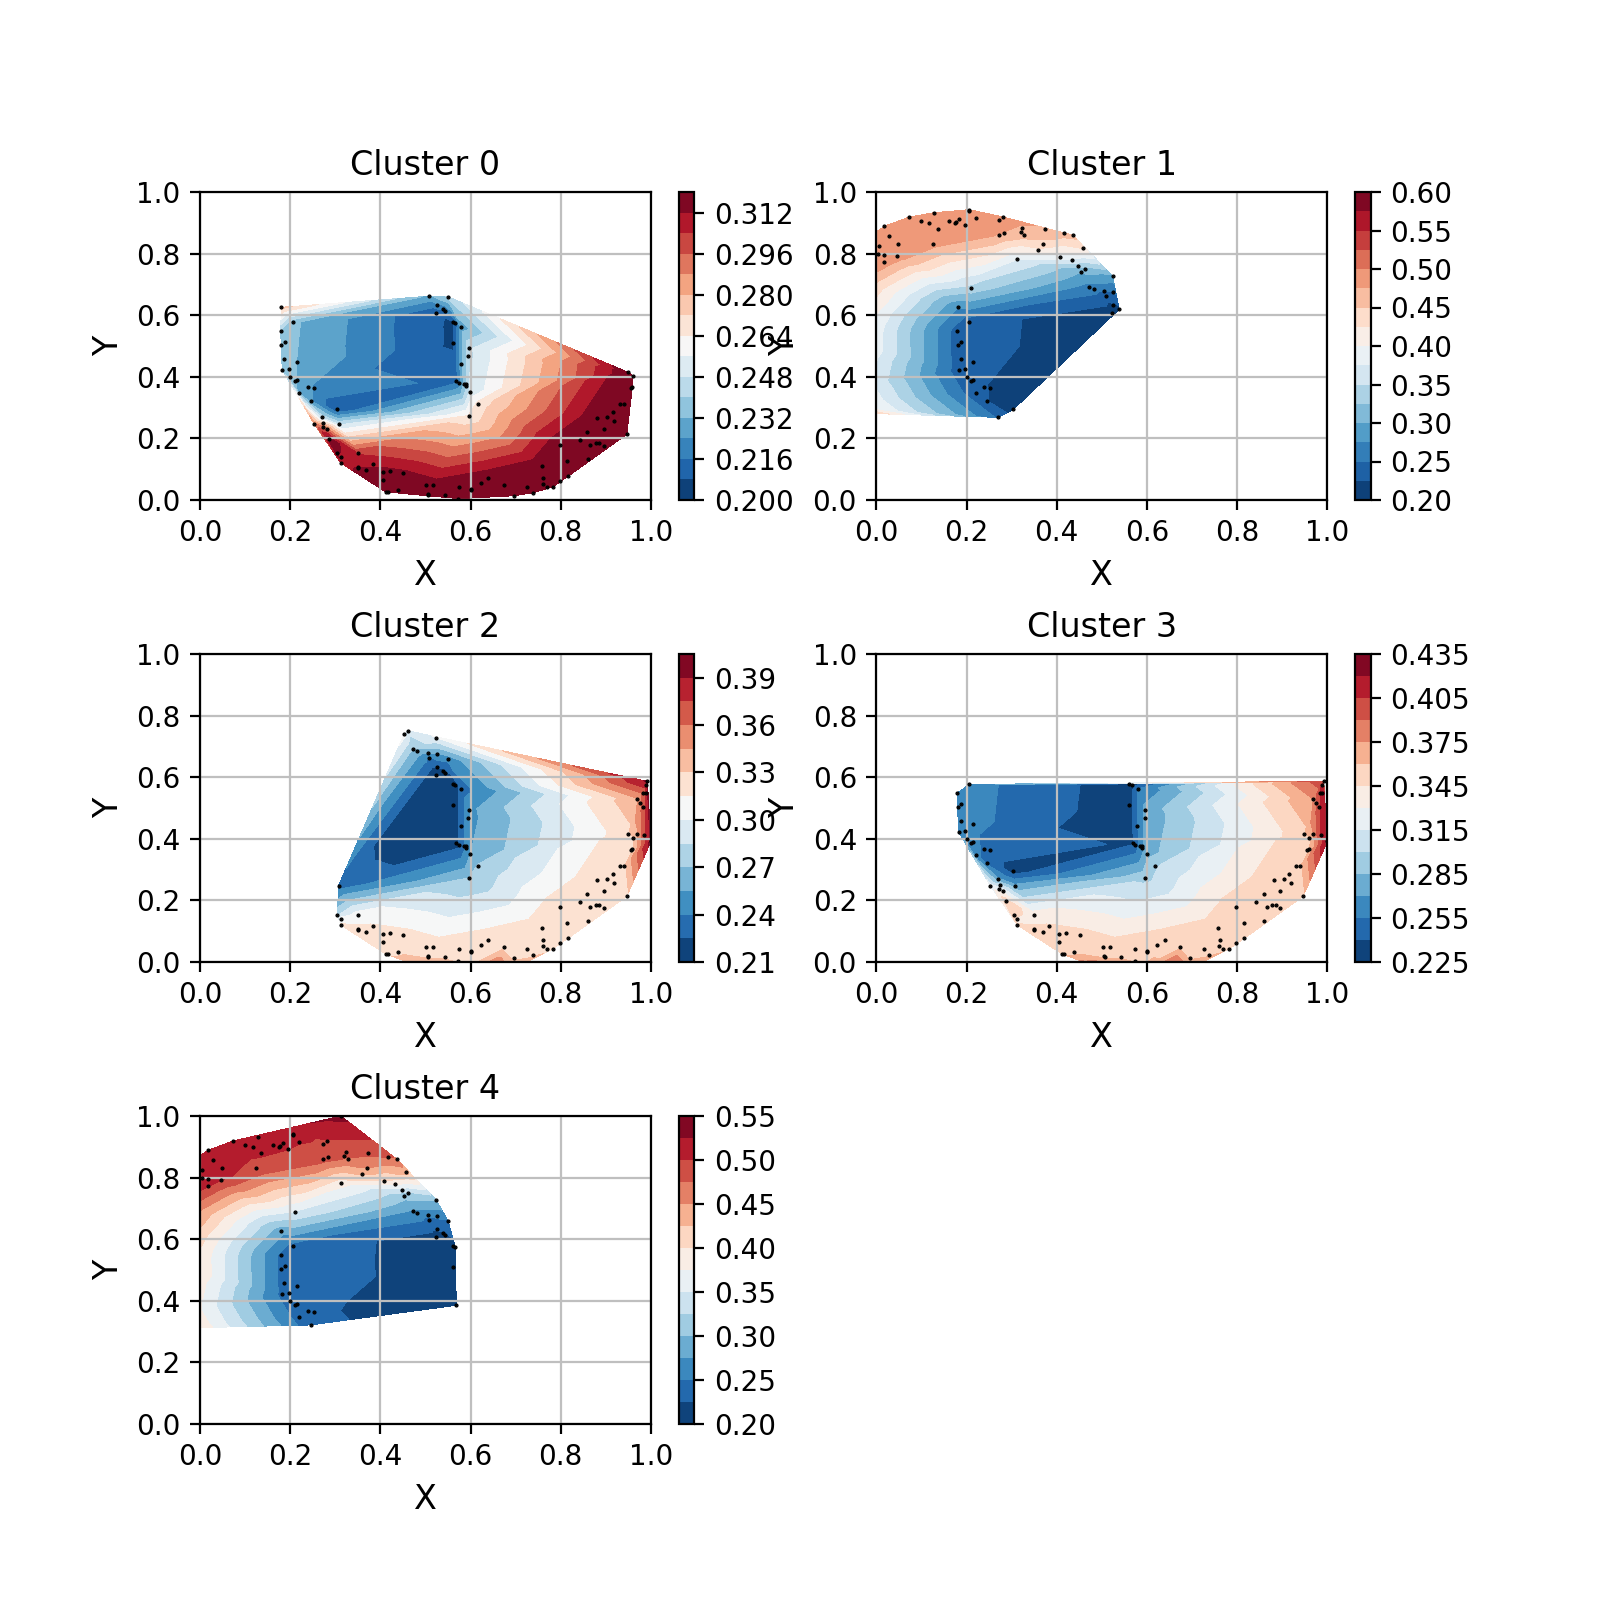

In [11]:
#plot out clusters memebership
fig = plt.figure(figsize=(8,8))
nplots = (int(np.ceil(len(unique_ks)/2)), 2)
for i in range(len(unique_ks)):
    data_contour, scores, _ = unpack_results(pred,target=i)
    plot_countour(fig, data_contour,scores, sub_index=i+1,nplots=nplots)

## Cluster segmentation by argmax

In [12]:
def get_clusters(pred):
    ks = []
    for result in pred:
        #unpack prediction
        res = [score for _, score in result]
        idxMax = np.argmax(res)
        k, _ = result[idxMax]
        ks.append(k)
    return ks

In [13]:
ks = get_clusters(pred)

<IPython.core.display.Javascript object>


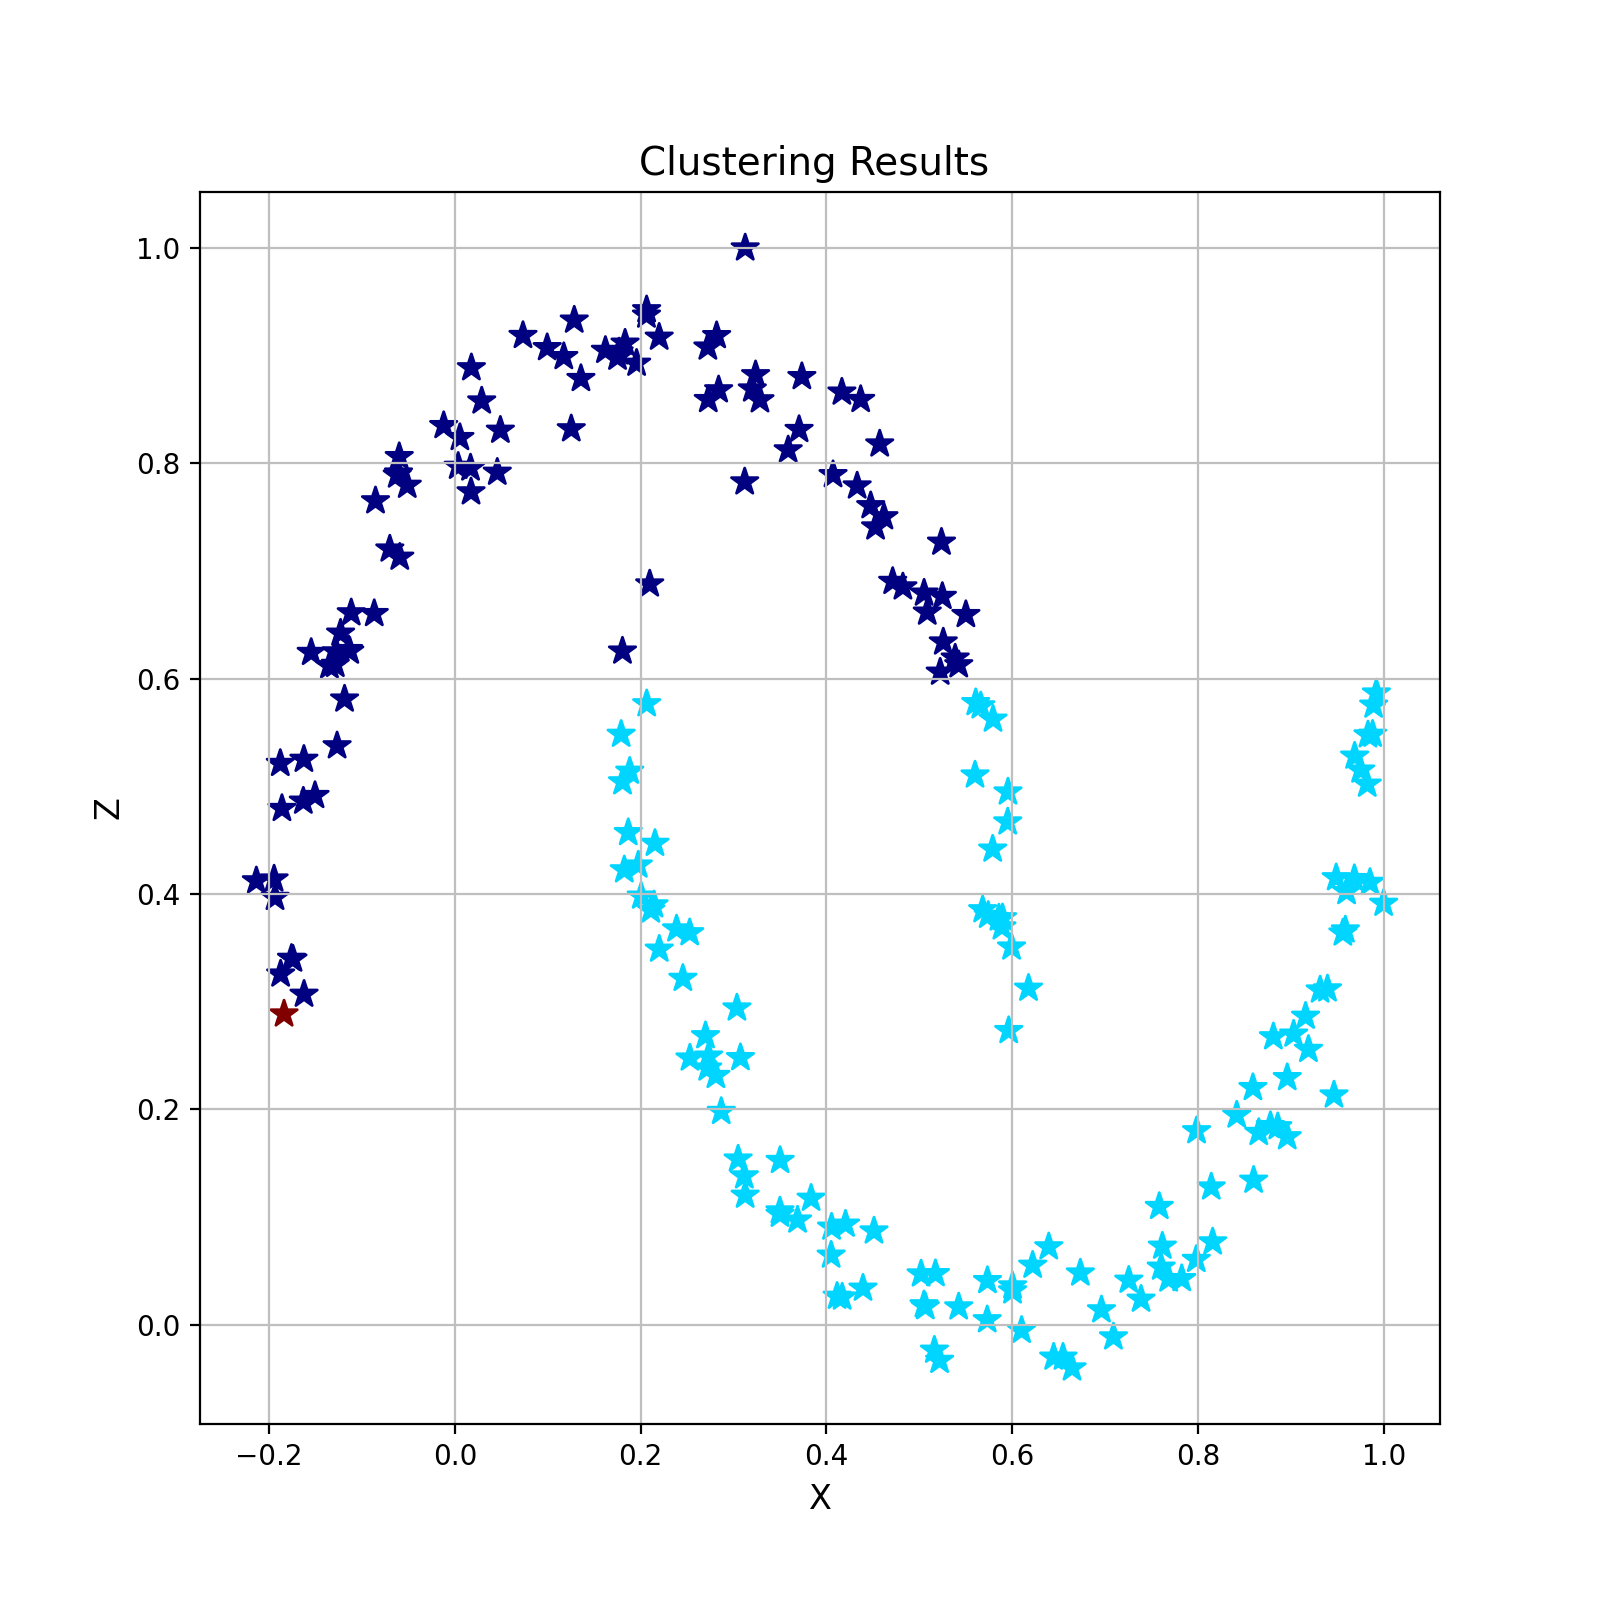

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_title("Clustering Results ",fontsize=14)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.set_ylabel("Z",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping to predicted class
color = [c+1 for c in ks]
ax.scatter(sample_data.data_normalized[...,0],sample_data.data_normalized[...,1],s=100,c=color, marker = '*', cmap = cm.jet_r );

plt.show()

In [15]:
color

[4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 4,
 5,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 4,
 4,
 5,
 2,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 5]